# Training dataset exploration

This notebook's purpose is to show exploratory analysis approaches for regression problems

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter('ignore')

sns.set_theme(style="darkgrid")

# Import data

In [17]:
train_data = pd.read_csv("../data/pre-processed/train.csv", delimiter=",",header=0, index_col=0)
sale_price = train_data["SalePrice"]
train_data = train_data.drop("SalePrice",axis=1)
test_data = pd.read_csv("../data/pre-processed/test.csv", delimiter=",",header=0, index_col=0)

In [26]:
ntrain = train_data.shape[0]
ntest = test_data.shape[0]
concat_data = pd.concat((train_data, test_data)).reset_index(drop=True)
nindex, nfeatures = concat_data.shape

#  Training data exploratory analysis

## Target study

### Raw Data

Skewness Co-efficient: 1.883
Kurotisis Co-efficient: 6.536


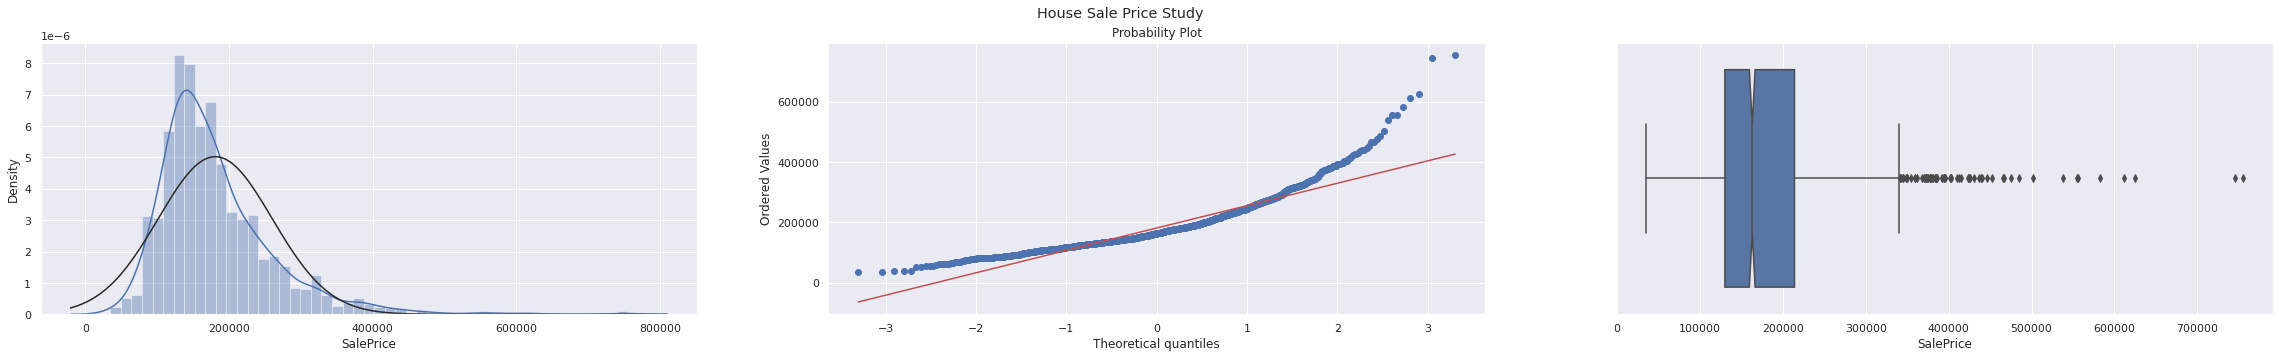

In [20]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(40,5))
fig.suptitle("House Sale Price Study")

# Histogram 
sns.distplot(dataset["SalePrice"], fit=stats.norm, ax=ax1)
# Q-Q Probability plot
stats.probplot(dataset["SalePrice"], plot=ax2)
#boxplot
sns.boxplot(dataset["SalePrice"], notch=True, ax=ax3)

print(f"Skewness Co-efficient: {round(dataset.SalePrice.skew(), 3)}")
print(f"Kurotisis Co-efficient: {round(dataset.SalePrice.kurtosis(), 3)}")

plt.show()

### Log-transform and center-scale

Skewness Co-efficient: -0.009
Kurotisis Co-efficient: 0.887


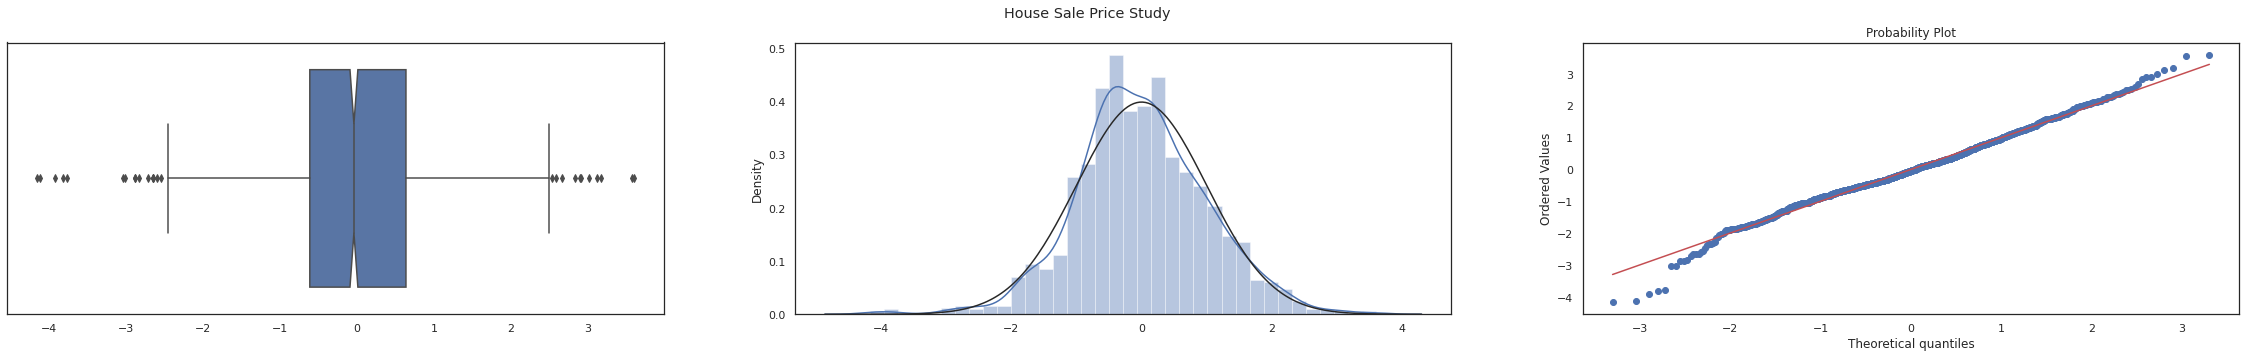

In [28]:
# log-trandform
log_sale_price = np.log1p(sale_price)
scaler = StandardScaler().fit(log_sale_price.values.reshape(-1,1))
transformed_target = scaler.transform(log_sale_price.values.reshape(-1,1))

print(f"Skewness Co-efficient: {round(log_sale_price.skew(), 3)}")
print(f"Kurotisis Co-efficient: {round(log_sale_price.kurtosis(), 3)}")

### Target description plots
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(40,5))
fig.suptitle("House Sale Price Study")

# Histogram 
sns.distplot(transformed_target, fit=stats.norm, ax=ax2)

# Q-Q Probability plot
### flatten center-scale tuple
import itertools
flattened_tranformed_target = list(itertools.chain(*transformed_target))
stats.probplot(np.asanyarray(flattened_tranformed_target), plot=ax3)

#boxplot
sns.boxplot(transformed_target, notch=True, ax=ax1)

plt.show()

## Missing values

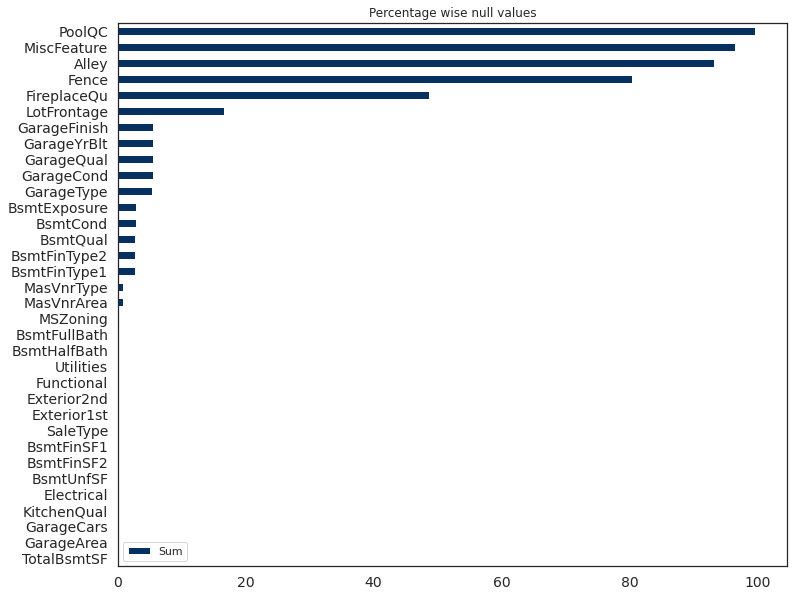

In [29]:
## Get the dataframe with all the features and SUM of the NaN values present
df_null_count = concat_data.isnull().sum(axis=0).to_frame().rename({0:"Sum"}, axis=1)

## Select only those features who have atleast 1 NaN value
df_null_count = df_null_count[df_null_count['Sum'] > 0]

## Change the SUM to PERCENTAGE 
df_null_count['Sum'] = df_null_count['Sum']*(100/nindex)

## Plot a Horizontal Bar Graph
df_null_count.sort_values(by="Sum", ascending=True).plot(
    kind='barh', figsize=(12,10), fontsize=14, colormap="RdBu_r", title="Percentage wise null values"
)
plt.show()

## Covariance heatmap

<AxesSubplot:>

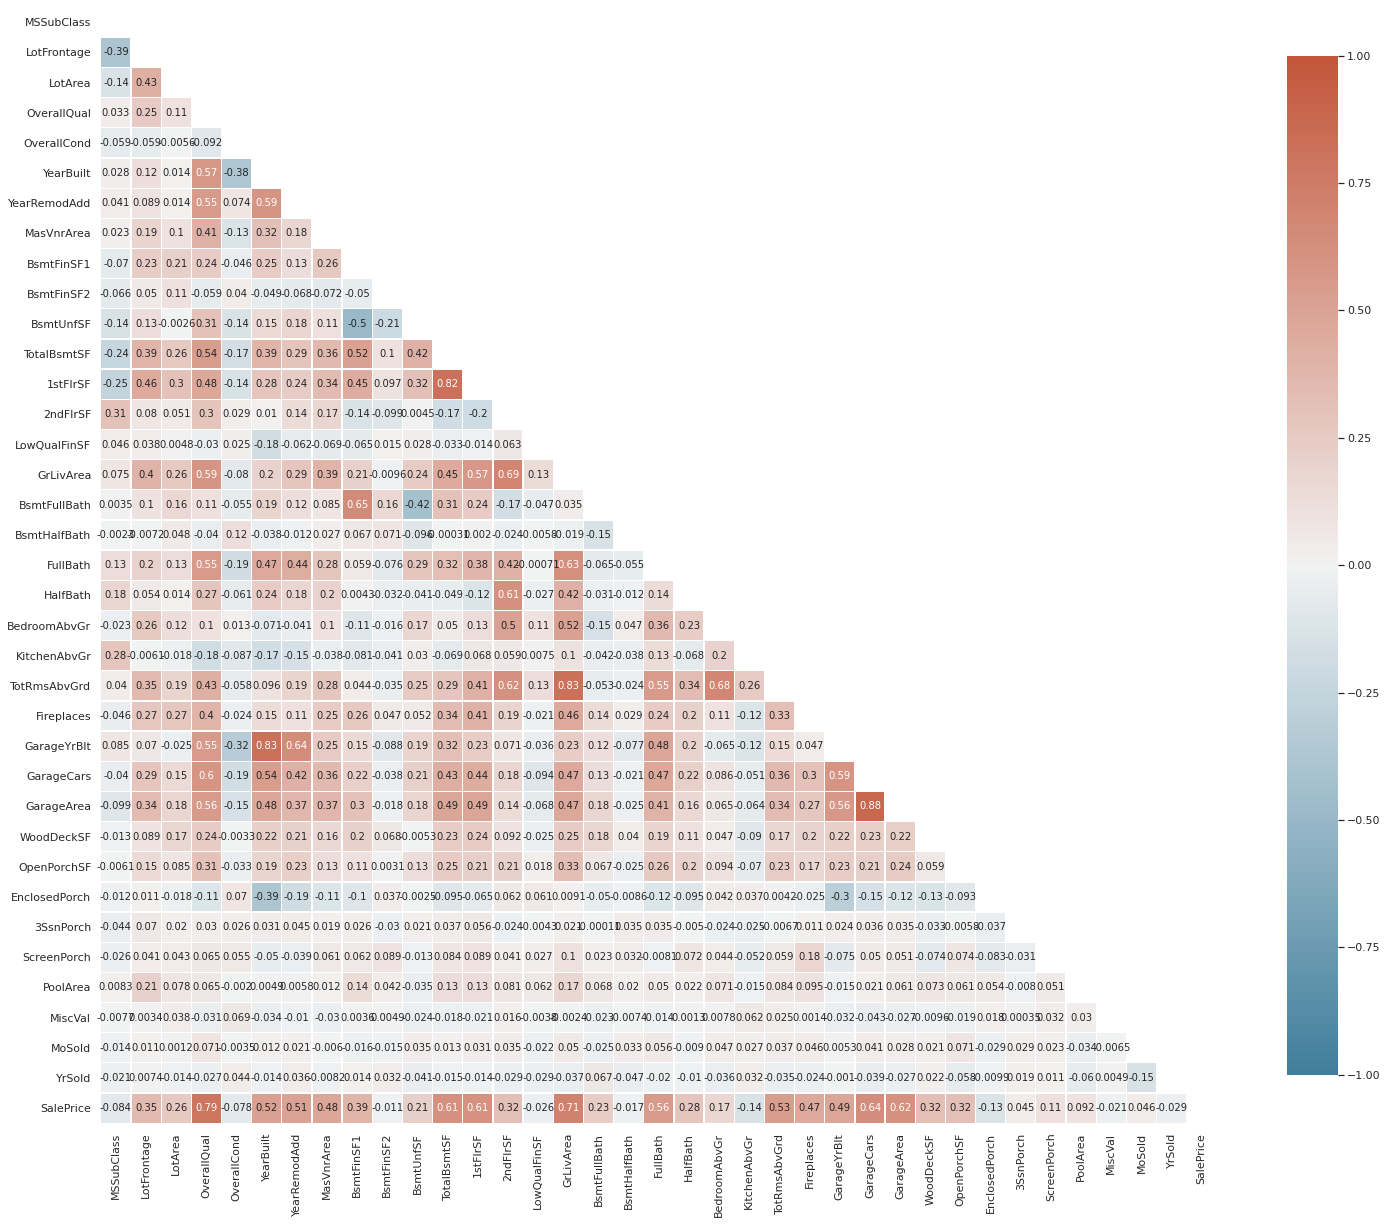

In [22]:
# Correlation matrix
corr = dataset.corr()

# Set up the matplotlib figure
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, vmax=1, vmin=-1,center=0,
            mask=mask, cmap=cmap, square=True,
            linewidths=.25, cbar_kws={"shrink": .75}, 
            annot=True, annot_kws={"size": 10})
